In [61]:
import pandas as pd
import seaborn as sns

In [198]:
data = pd.read_csv('data.txt')


In [199]:
data.head()
data = data.drop('date', axis=1)
data


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [200]:
# Especifica el valor y el caracter que deseas eliminar
valor_a_eliminar = 'finishing ' # Reemplaza 'valor_a_eliminar' con el valor específico que deseas filtrar
caracter_a_eliminar = ' '  # Reemplaza 'caracter_a_eliminar' con el caracter que deseas eliminar

# Reemplazar el caracter en las celdas con el valor especificado
data['department'] = data['department'].str.replace(caracter_a_eliminar, '')

# Imprimir el DataFrame actualizado
# print(data)

In [201]:
data['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [202]:
datacopy = data
data_sin_nulos = datacopy.dropna(subset=['wip'])
# Calcular la media de 'wip' para cada combinación de 'department' y 'team'
media_wip_por_combinacion = datacopy.groupby(['department', 'team'])['wip'].mean()

# Imprimir la media de 'wip' por combinación de 'department' y 'team'
print("Media de 'wip' por combinación de 'department' y 'team':")
print(media_wip_por_combinacion)


Media de 'wip' por combinación de 'department' y 'team':
department  team
finishing   1               NaN
            2               NaN
            3               NaN
            4               NaN
            5               NaN
            6               NaN
            7               NaN
            8               NaN
            9               NaN
            10              NaN
            11              NaN
            12              NaN
sweing      1       1609.196429
            2       1326.280702
            3       1409.293103
            4       1218.677966
            5        773.741379
            6        936.559322
            7        999.509091
            8        984.375000
            9       1283.724138
            10      1528.333333
            11       968.135593
            12      1259.915254
Name: wip, dtype: float64


In [203]:
datos_finishing = data[data['department'] == 'finishing']

if datos_finishing['wip'].isnull().all():
    print("Todos los valores en la lista resultante son vacíos.")
else:
    print("Al menos un valor en la lista resultante no es vacío.")


Todos los valores en la lista resultante son vacíos.


In [209]:
# Calcular el valor promedio de 'wip' para cada equipo
promedio_wip_por_equipo = data.groupby('team')['wip'].mean()
promedio_wip_por_equipo

team
1     1609.196429
2     1326.280702
3     1409.293103
4     1218.677966
5      773.741379
6      936.559322
7      999.509091
8      984.375000
9     1283.724138
10    1528.333333
11     968.135593
12    1259.915254
Name: wip, dtype: float64

In [207]:
data.iloc[1,6]

nan

In [214]:
datac = data# Recorrer las filas de la columna 'wip'
for indice, valor_wip in enumerate(datac['wip']):
    # Verificar si el valor de 'wip' en la fila actual es nulo o faltante
    if pd.isnull(valor_wip):
        equipo = datac.iloc[indice, 3]
        media = promedio_wip_por_equipo[equipo]
        print(indice), print(equipo)
        datac.iloc[indice, 6] = media
datac.head(50)
data = datac

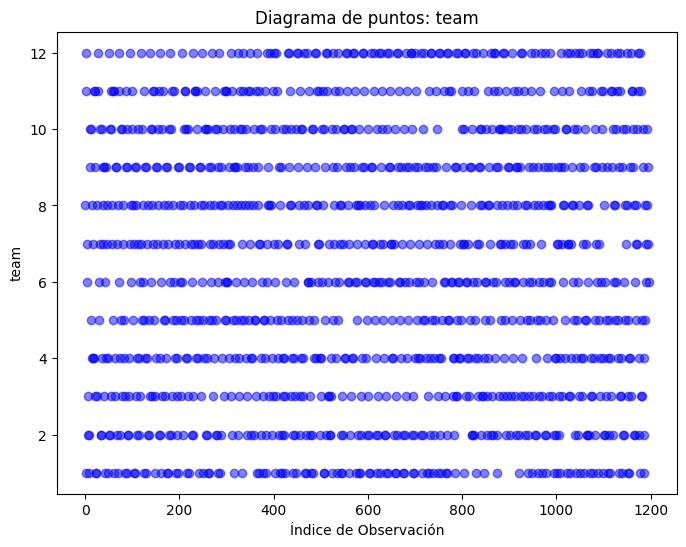

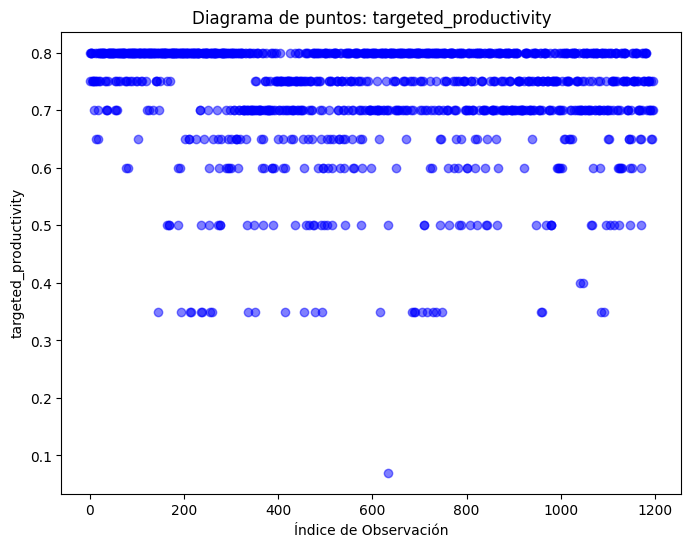

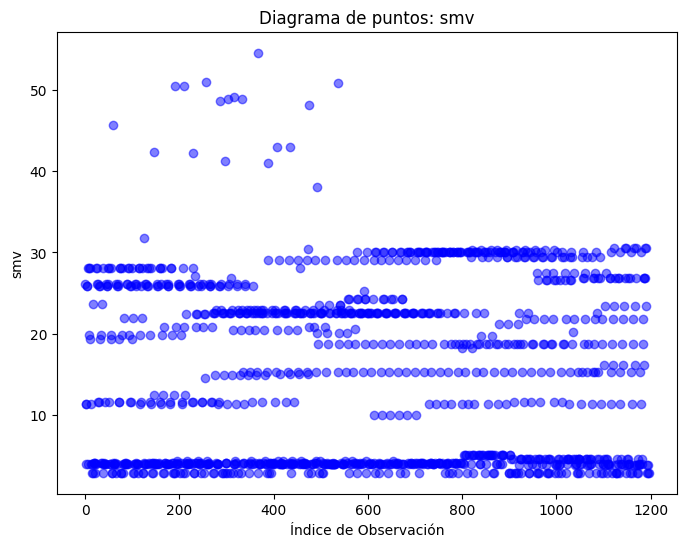

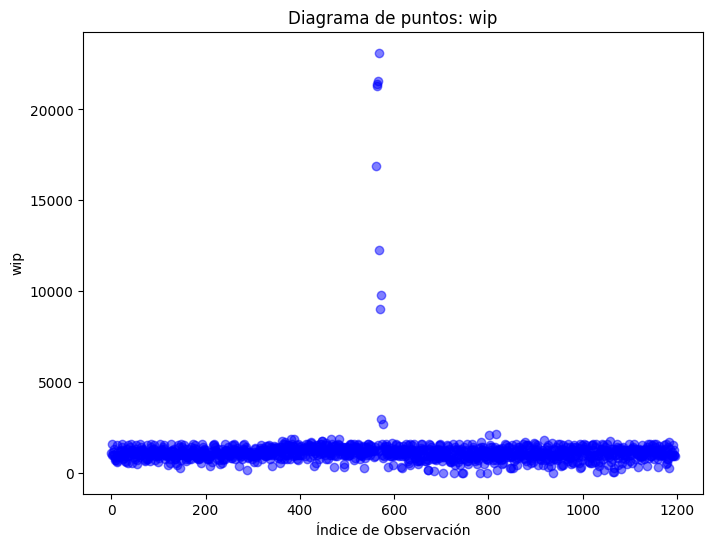

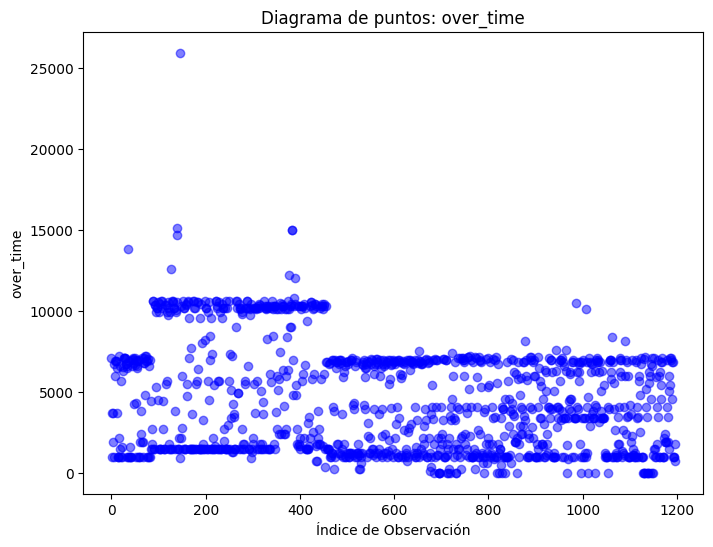

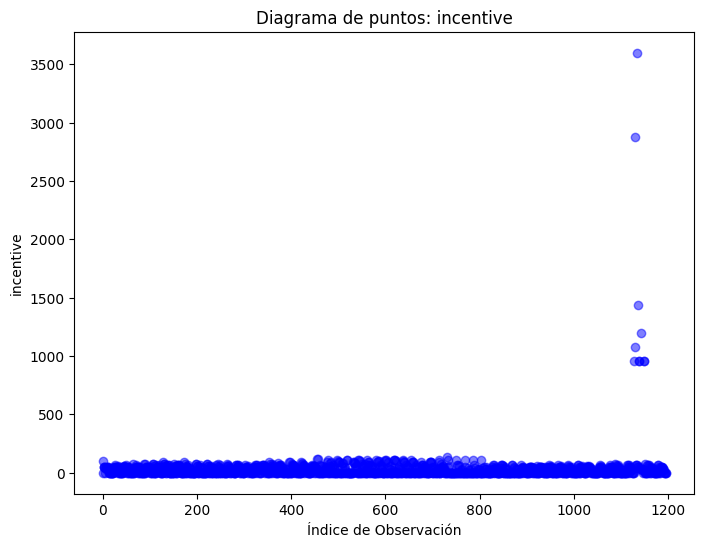

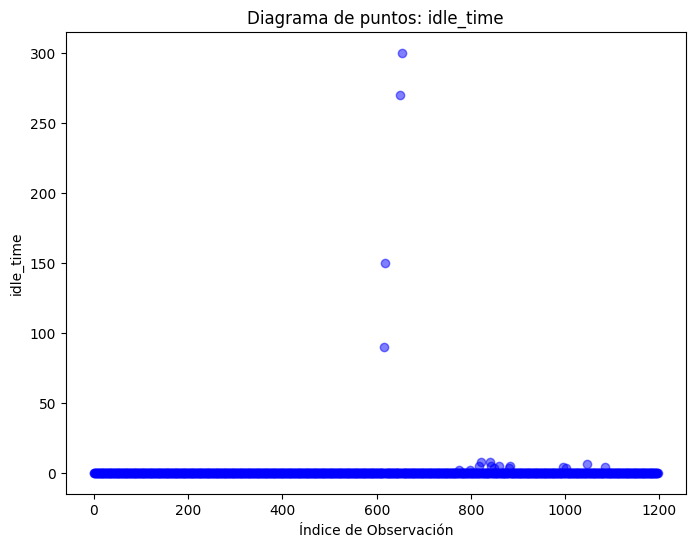

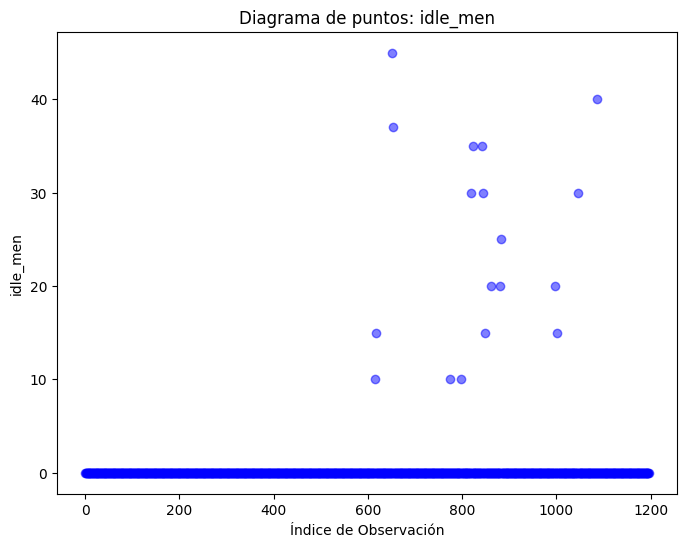

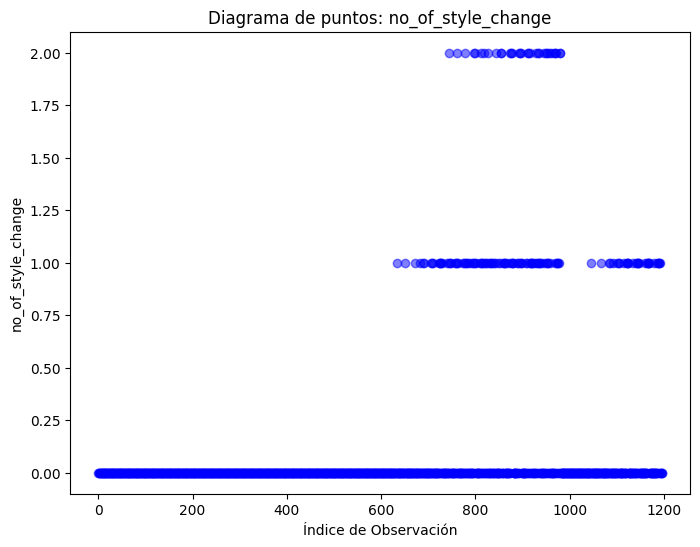

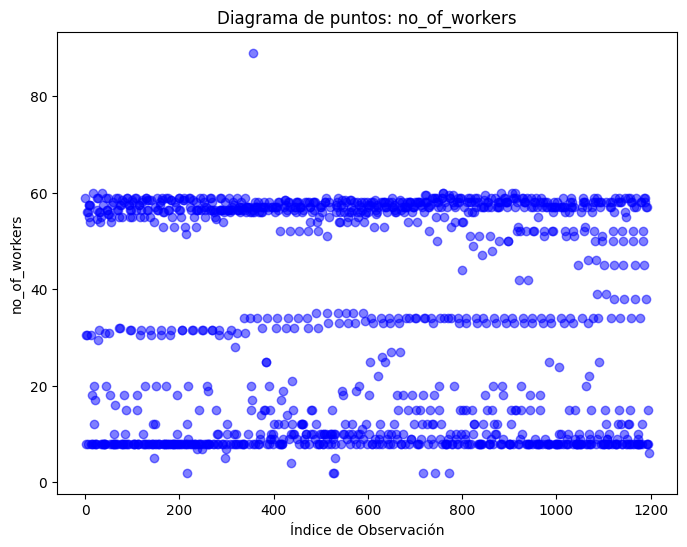

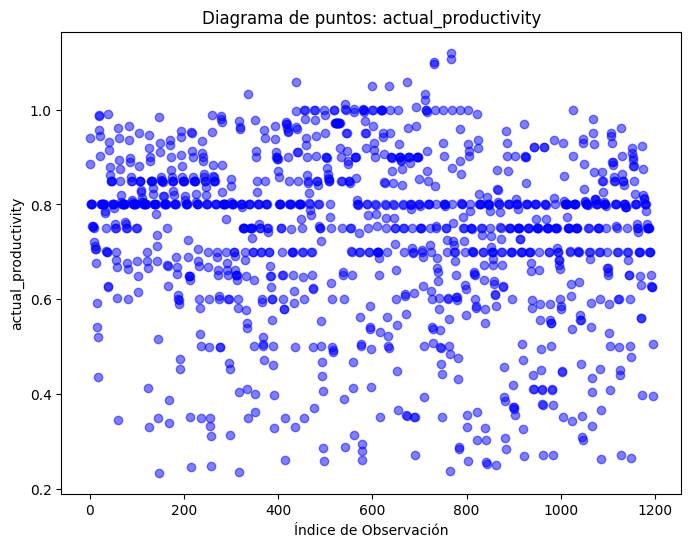

In [216]:
import matplotlib.pyplot as plt

numeric_variables = data.select_dtypes(include=['float64', 'int64'])

# Generar diagrama de puntos para cada variable numérica
for column in numeric_variables.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data.index, data[column], alpha=0.5, color='blue')
    plt.title(f'Diagrama de puntos: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

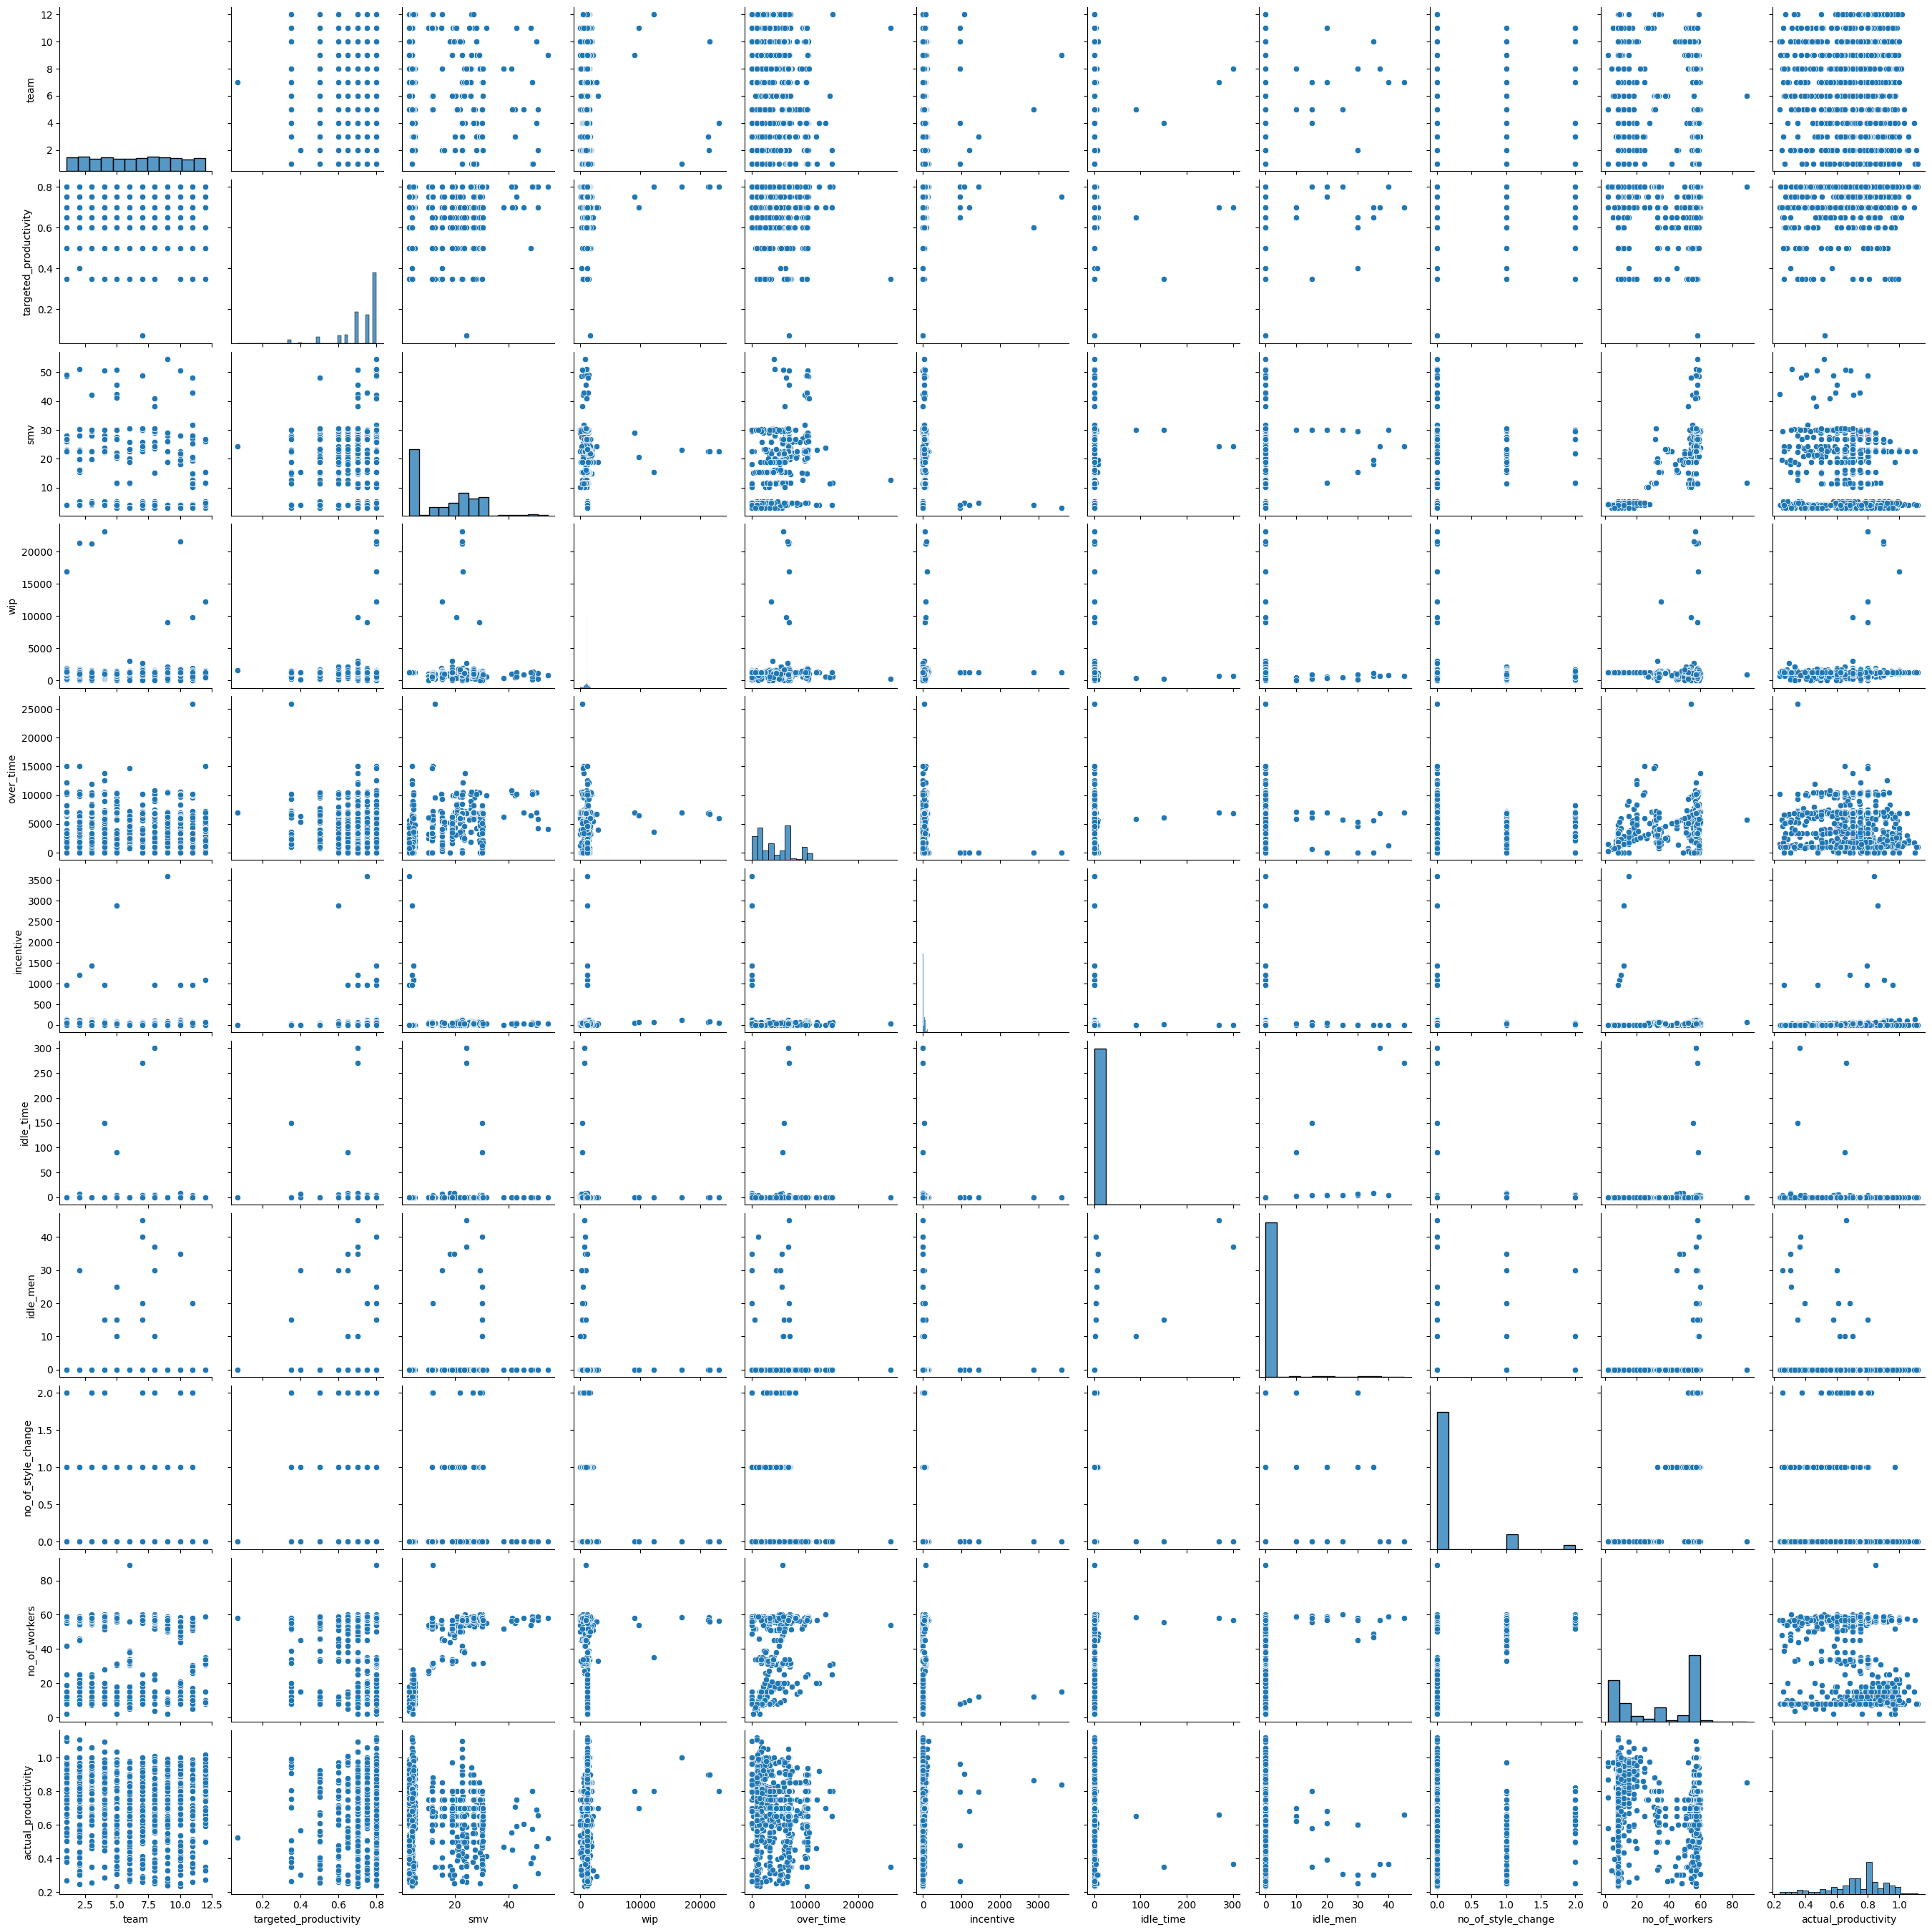

In [28]:
sns.pairplot(data,)